Number of Omega-automaton states (including the trap state): 11
Number of accepting pairs: 1


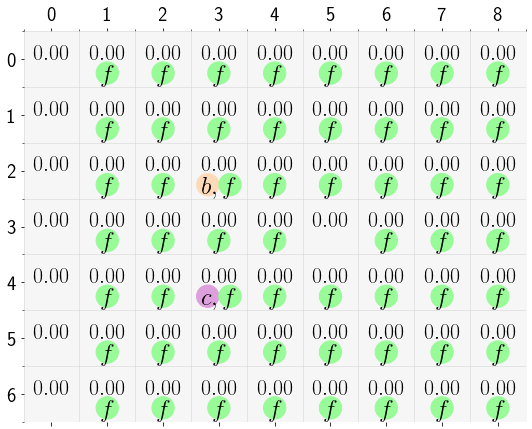

In [1]:
%matplotlib inline
from csrl.mdp import GridMDP
from csrl.oa import OmegaAutomaton
from csrl import ControlSynthesis
import numpy as np
import pickle

# Specification
phi_det = 'F(u & Xu & (XXm | XXXm))'
phi_obj = '(GFb & GFc & FGf)'
ltl = phi_det +' | ' + phi_obj

oa = OmegaAutomaton(ltl,oa_type='dra')
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
print('Number of accepting pairs:',oa.shape[0])
display(oa)

# MDP Description
shape = (7,9)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
    ['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E']
])

label = np.array([
    [(),        ('f',),        ('f',),    ('f',),    ('f',),    ('f',),    ('f',),    ('f',),    ('f',)],
    [(),        ('f',),        ('f',),    ('f',),    ('f',),    ('f',),    ('f',),    ('f',),    ('f',)],
    [(),        ('f',),        ('f',),    ('b','f'), ('f',),    ('f',),    ('f',),    ('f',),    ('f',)],
    [(),        ('f',),        ('f',),    ('f',),    ('f',),    (),        ('f',),    ('f',),    ('f',)],
    [(),        ('f',),        ('f',),    ('c','f'), ('f',),    ('f',),    ('f',),    ('f',),    ('f',)],
    [(),        ('f',),        ('f',),    ('f',),    ('f',),    ('f',),    ('f',),    ('f',),    ('f',)],
    [(),        ('f',),        ('f',),    ('f',),    ('f',),    ('f',),    ('f',),    ('f',),    ('f',)]
],dtype=np.object)

reward = np.zeros(shape)

lcmap={
    'b':'peachpuff',
    'c':'plum',
    'f':'palegreen'
}

grid_mdp = GridMDP(shape=shape,structure=structure,reward=reward,label=label,figsize=9,secure=True,lcmap=lcmap)  # Use figsize=4 for smaller figures
grid_mdp.plot()
# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)

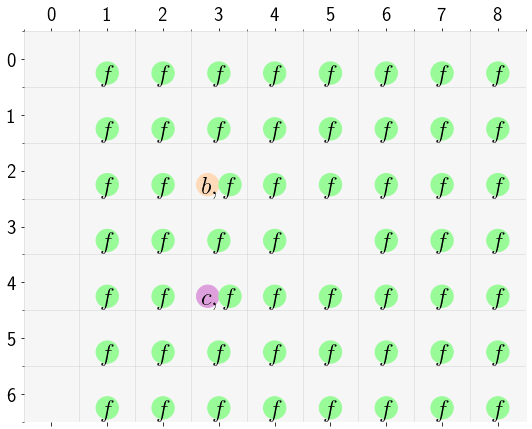

In [15]:
grid_mdp.plot(value=np.zeros((7,9)),policy=np.zeros((7,9)),save='surveillance.png')

In [2]:
# Q=csrl.minimax_q(T=2**10,K=2**20)
Q = np.load('surveillance_Q.npy')
with open('surveillance_csrl.pkl','rb') as f:
    csrl = pickle.load(f)

In [3]:
policy = np.argmax(np.min(Q,axis=-1),axis=-1)
policy_ = np.take_along_axis(np.argmin(Q,axis=-1),np.expand_dims(policy,axis=-1),axis=-1).reshape(policy.shape)

value = np.max(np.min(Q,axis=-1),axis=-1)
_value = np.copy(value)
_policy = np.copy(policy)
_value[:] = np.max(value,axis=0)
_policy[:] = np.argmax(value,axis=0)

ind = (csrl.discountC*_value) > value
policy[ind] = _policy[ind] + len(csrl.mdp.A)
csrl.plot(value=value,policy=policy,policy_=policy_)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=10),…

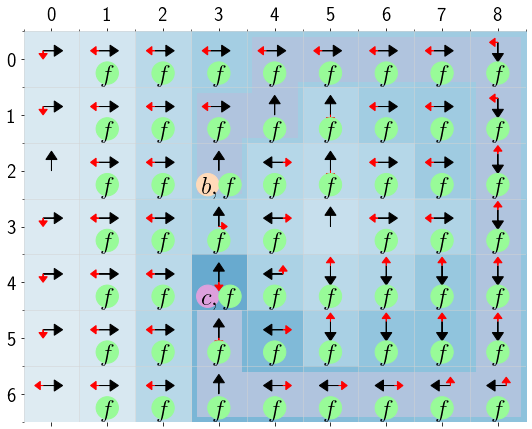

In [4]:
path = {
    (2,3) : 'u',
    (1,3) : 'dr',
    (1,4) : 'lu',
    (0,4) : 'dr',
    (0,5) : 'lr',
    (0,6) : 'lr',
    (0,7) : 'lr',
    (0,8) : 'ld',
    (1,8) : 'ud',
    (2,8) : 'ud',
    (3,8) : 'ud',
    (4,8) : 'ud',
    (5,8) : 'ud',
    (6,8) : 'ul',
    (6,7) : 'rl',
    (6,6) : 'rl',
    (6,5) : 'rl',
    (6,4) : 'rl',
    (6,3) : 'ru',
    (5,3) : 'du',
}
hidden=[]
csrl.plot(value=value,policy=policy,policy_=policy_,iq=(0,0),path=path,hidden=hidden,save='secure_controller_b_to_c.pdf')

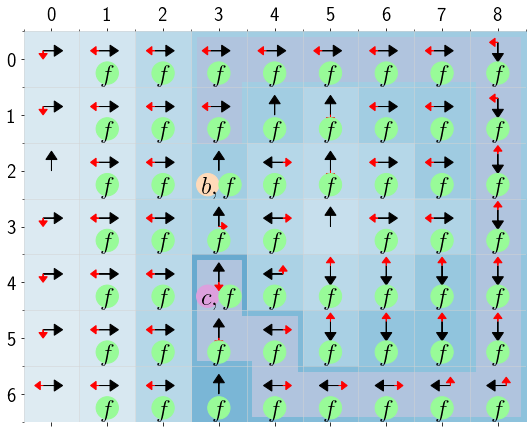

In [5]:
path = {
    (1,3) : 'du',
    (0,3) : 'dr',
    (0,4) : 'lr',
    (0,5) : 'lr',
    (0,6) : 'lr',
    (0,7) : 'lr',
    (0,8) : 'ld',
    (1,8) : 'ud',
    (2,8) : 'ud',
    (3,8) : 'ud',
    (4,8) : 'ud',
    (5,8) : 'ud',
    (6,8) : 'ul',
    (6,7) : 'rl',
    (6,6) : 'rl',
    (6,5) : 'rl',
    (6,4) : 'ru',
    (5,4) : 'dl',
    (5,3) : 'ru',
    (4,3) : 'd',
}
hidden=[]
csrl.plot(value=value,policy=policy,policy_=policy_,iq=(0,0),path=path,hidden=hidden,save='secure_controller_c_to_b.pdf')

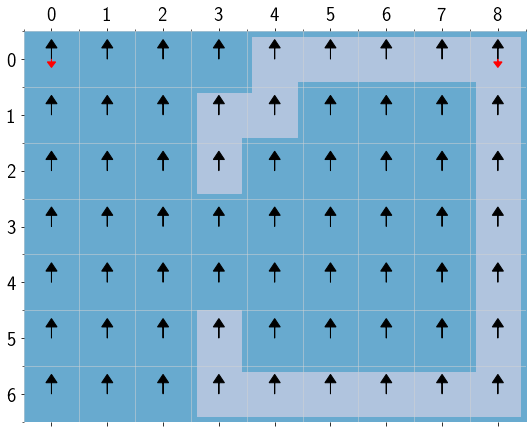

In [6]:
path = {
    (2,3) : 'u',
    (1,3) : 'dr',
    (1,4) : 'lu',
    (0,4) : 'dr',
    (0,5) : 'lr',
    (0,6) : 'lr',
    (0,7) : 'lr',
    (0,8) : 'ld',
    (1,8) : 'ud',
    (2,8) : 'ud',
    (3,8) : 'ud',
    (4,8) : 'ud',
    (5,8) : 'ud',
    (6,8) : 'ul',
    (6,7) : 'rl',
    (6,6) : 'rl',
    (6,5) : 'rl',
    (6,4) : 'rl',
    (6,3) : 'ru',
    (5,3) : 'du',
}
hidden=[]
csrl.mdp.label = np.empty(shape,dtype=np.object)
csrl.mdp.label.fill(())
csrl.plot(value=value,policy=policy,policy_=policy_,iq=(0,1),path=path,hidden=hidden,save='secure_controller_b_to_c_1.pdf')

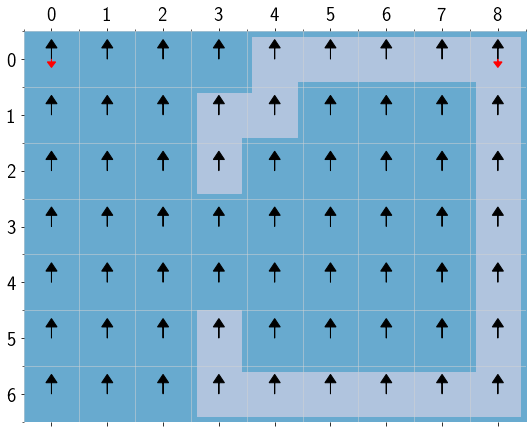

In [7]:
path = {
    (2,3) : 'u',
    (1,3) : 'dr',
    (1,4) : 'lu',
    (0,4) : 'dr',
    (0,5) : 'lr',
    (0,6) : 'lr',
    (0,7) : 'lr',
    (0,8) : 'ld',
    (1,8) : 'ud',
    (2,8) : 'ud',
    (3,8) : 'ud',
    (4,8) : 'ud',
    (5,8) : 'ud',
    (6,8) : 'ul',
    (6,7) : 'rl',
    (6,6) : 'rl',
    (6,5) : 'rl',
    (6,4) : 'rl',
    (6,3) : 'ru',
    (5,3) : 'du',
}
hidden=[]
csrl.mdp.label = np.empty(shape,dtype=np.object)
csrl.mdp.label.fill(())
csrl.plot(value=value,policy=policy,policy_=policy_,iq=(0,2),path=path,hidden=hidden,save='secure_controller_b_to_c_2.pdf')

In [10]:
episode=csrl.simulate(policy,policy_,value=value,start=(0,0),T=1000,animation='test')

interactive(children=(IntSlider(value=0, description='t', max=999), Output()), _dom_classes=('widget-interact'…

In [17]:
np.save('surveillance_episode',np.array(episode))

In [16]:
# np.save('robust_episode',np.array(episode))
import os
import matplotlib.pyplot as plt
pad=5
animation='test'
# T=1000
# if not os.path.exists(animation):
#     os.makedirs(animation)
# for t in range(T):
#     csrl.mdp.plot(value=value[episode[t][:2]],policy=policy[episode[t][:2]],policy_=policy_[episode[t][:2]],agent=episode[t][2:],save=animation+os.sep+str(t).zfill(pad)+'.png',title='Time: '+str(t)+',  Accepting Pair: '+str(episode[t][0]+1)+',  DRA State (Mode): '+str(episode[t][1]))
#     plt.close()
os.system('ffmpeg -r 5 -i '+animation+os.sep+'%0'+str(pad)+'d.png -vcodec libx264 -y '+animation+'.mp4')

0